In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2
from random import randint

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
BRAIN_TUMOR_YES_PATH = 'brain_tumor_dataset/yes/'
BRAIN_TUMOR_NO_PATH = 'brain_tumor_dataset/no/'


IMG_HEIGHT, IMG_WIDTH = 128, 128

brainTumor_yes_images = [ f for f in listdir(BRAIN_TUMOR_YES_PATH) if isfile(join(BRAIN_TUMOR_YES_PATH,f))]
brainTumor_no_images = [ f for f in listdir(BRAIN_TUMOR_NO_PATH) if isfile(join(BRAIN_TUMOR_NO_PATH,f))]

yes_images = np.empty((len(brainTumor_yes_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')
no_images = np.empty((len(brainTumor_no_images), IMG_HEIGHT, IMG_WIDTH), dtype='float32')

In [3]:
# Adding new dimension to images to accomodate 3 dimensions for RGB
#yes_images = yes_images[:,:,:,np.newaxis]
#no_images = no_images[:,:,:,np.newaxis]

In [4]:
target_yes = np.full(len(brainTumor_yes_images),1)
target_no = np.full(len(brainTumor_no_images),0)

In [5]:
# Specifying the labels 'Yes' and 'No' as 1 and 0 for patients having tumor and not having tumor
y = np.hstack((target_yes,target_no))

In [6]:
yes_images.shape

(155, 128, 128)

In [7]:
for i,name_of_image in enumerate(brainTumor_yes_images):
    # Read the image one by one
    im = cv2.imread(BRAIN_TUMOR_YES_PATH + name_of_image,flags=cv2.IMREAD_GRAYSCALE).astype("int16").astype('float32')
    # Resize the image using Lanczos interpolation
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    # Normalizing the values of the images 
    im = (im - np.min(im)) / (np.max(im) - np.min(im))
    # store the final values in x_data which is right now empty 
    yes_images[i] = im

In [8]:
for i,name_of_image in enumerate(brainTumor_no_images):
    # Read the image one by one
    im = cv2.imread(BRAIN_TUMOR_NO_PATH + name_of_image,flags=cv2.IMREAD_GRAYSCALE).astype("int16").astype('float32')
    # Resize the image using Lanczos interpolation
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    # Normalizing the values of the images 
    im = (im - np.min(im)) / (np.max(im) - np.min(im))
    # store the final values in x_data which is right now empty 
    no_images[i] = im

In [9]:
all_images = np.concatenate((yes_images,no_images))

In [10]:
len(all_images) == len(y)

True

Text(0.5, 1.0, 'Brain Image without Tumor')

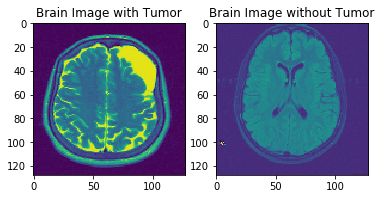

In [11]:
# Pick up the random image
random_with_tumor_image_idx = randint(0, len(yes_images)+1)
random_without_tumor_image_idx = randint(len(yes_images)+1, len(all_images))

%matplotlib inline    
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(all_images[random_with_tumor_image_idx])
ax1.set_title('Brain Image with Tumor')
ax2.imshow(all_images[random_without_tumor_image_idx])
ax2.set_title('Brain Image without Tumor')

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
# Data generator for test data
test_datagen = ImageDataGenerator(rescale = 1./255)

# This will pick up each training images and create the augmented images of batch size 32 and output of eaxh image will be 64x64
training_set = train_datagen.flow_from_directory('brain_tumor_images/training_data/',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# This will pick up each testing images and create the augmented images of batch size 32 and output of eaxh image will be 64x64
test_set = test_datagen.flow_from_directory('brain_tumor_images/test_data/',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 175 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [13]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3),padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.45))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

W1124 13:41:45.604921 10272 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1124 13:41:45.643752 10272 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1124 13:41:45.647858 10272 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1124 13:41:45.681226 10272 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1124 13:41:45.690739 10272 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:133:

In [14]:
model.compile(loss='binary_crossentropy',
             optimizer='Adam',
             metrics=['acc'])

W1124 13:41:45.915004 10272 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1124 13:41:45.954362 10272 deprecation_wrapper.py:119] From F:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1124 13:41:45.972320 10272 deprecation.py:323] From F:\Anaconda\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
# start training with augmented images of training data using CNN

model.fit_generator(training_set,
                         steps_per_epoch = 150,
                         epochs = 10,validation_data = test_set,
                         validation_steps = 100)

Epoch 1/10
150/150 [==============================] - 137s 917ms/step - loss: 0.6040 - acc: 0.7084 - val_loss: 0.4959 - val_acc: 0.7705
Epoch 2/10
150/150 [==============================] - 129s 860ms/step - loss: 0.3873 - acc: 0.8393 - val_loss: 0.4667 - val_acc: 0.8189
Epoch 3/10
150/150 [==============================] - 126s 840ms/step - loss: 0.2757 - acc: 0.8891 - val_loss: 0.6113 - val_acc: 0.7960
Epoch 4/10
150/150 [==============================] - 128s 857ms/step - loss: 0.1774 - acc: 0.9334 - val_loss: 0.5643 - val_acc: 0.8196
Epoch 5/10
150/150 [==============================] - 129s 863ms/step - loss: 0.0995 - acc: 0.9620 - val_loss: 0.6711 - val_acc: 0.8596
Epoch 6/10
150/150 [==============================] - 129s 859ms/step - loss: 0.0563 - acc: 0.9800 - val_loss: 0.9013 - val_acc: 0.8203
Epoch 7/10
150/150 [==============================] - 130s 867ms/step - loss: 0.0483 - acc: 0.9836 - val_loss: 0.6609 - val_acc: 0.8457
Epoch 8/10
150/150 [============================

## Prediction

In [93]:
brainTumor_yes_images_test = [ f for f in listdir('brain_tumor_images/test_data/yes/') if isfile(join('brain_tumor_images/test_data/yes/',f))]
brainTumor_no_images_test = [ f for f in listdir('brain_tumor_images/test_data/no/') if isfile(join('brain_tumor_images/test_data/no/',f))]

In [94]:
test_images_list = []
test_images_with_tumors = []
test_images_without_tumors = []

for image in brainTumor_yes_images_test:
    im = cv2.imread('brain_tumor_images/test_data/yes/' + image)
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    test_images_list.append(im)
    test_images_with_tumors.append(im)

for image in brainTumor_no_images_test:
    im = cv2.imread('brain_tumor_images/test_data/no/' + image)
    im = cv2.resize(im, dsize=(IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_LANCZOS4)
    test_images_list.append(im)
    test_images_without_tumors.append(im)

In [95]:
target_yes_test = np.full(len(brainTumor_yes_images_test),1)
target_no_test = np.full(len(brainTumor_no_images_test),0)

In [96]:
y_test = np.hstack((target_yes_test,target_no_test))
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [97]:
len(y_test) == len(test_images_list)

True

### Plotting all the Brain CT scan with tumors

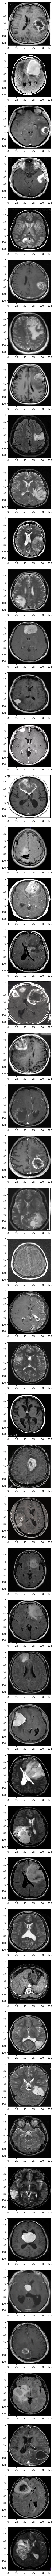

In [128]:
figure = plt.figure(figsize=(200, 200))
for i in range(1, len(test_images_with_tumors) + 1):
    figure.add_subplot(50, 1, i)
    plt.imshow(test_images_with_tumors[i-1])

### Plotting all the Brain CT scan without tumors

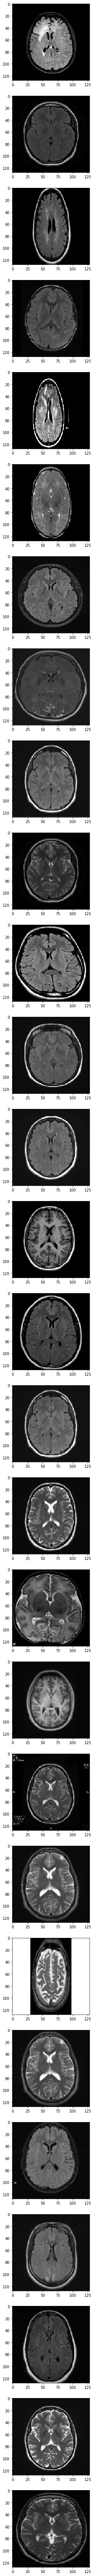

In [125]:
figure = plt.figure(figsize=(128, 128))
for i in range(1, len(test_images_without_tumors) + 1):
    figure.add_subplot(28, 1, i)
    plt.imshow(test_images_without_tumors[i-1])

In [129]:
X_test = np.array(test_images_list)

In [132]:
y_pred = model.predict(X_test)
y_pred = np.array(list(map(int,np.around(np.squeeze(y_pred)))))

In [133]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [134]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

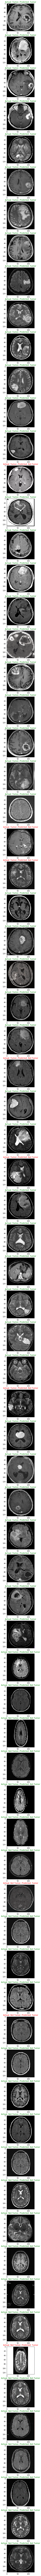

In [139]:
figure = plt.figure(figsize=(300, 300))
for i in range(1, len(test_images_list) + 1):
    figure.add_subplot(len(test_images_list), 1, i)
    plt.imshow(test_images_list[i-1])
    if(y_test[i-1]==0 and y_pred[i-1]==0):
        plt.title("Actual: {}, Predicted: {}".format("Not Tumor","Not Tumor"),color='green')
    elif(y_test[i-1]==0 and y_pred[i-1]==1):
        plt.title("Actual: {}, Predicted: {}".format("Not Tumor","Tumor"),color="red")
    elif(y_test[i-1]==1 and y_pred[i-1]==0):
        plt.title("Actual: {}, Predicted: {}".format("Tumor","Not Tumor"),color='red')
    elif(y_test[i-1]==1 and y_pred[i-1]==1):
        plt.title("Actual: {}, Predicted: {}".format("Tumor","Tumor"),color="green")

In [140]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.884615380030412


In [ ]:
mo.save('BrainTumor_Detection 88 Percent accuracy.h5')